In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Reading stock data from yahoo
from pandas_datareader import data, wb

#Time stamps
from datetime import datetime

#Division
from __future__ import division

from pandas_datareader import data as pdr

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','TSLA']

In [3]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,85.478819,83.126974,84.282679,84.395258,1.513483e+08,84.123722
std,20.078792,19.244560,19.857880,19.628336,7.430297e+07,19.782612
min,57.125000,53.152500,57.020000,56.092499,3.247000e+07,55.840385
25%,69.582500,67.288124,68.268122,68.663124,1.027230e+08,68.255310
50%,79.719997,78.150002,78.891247,79.162502,1.347102e+08,78.653919
75%,97.174374,94.843126,96.453753,96.224377,1.824696e+08,96.051195
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,134.179993


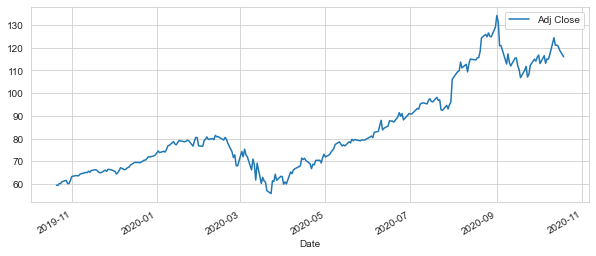

In [6]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

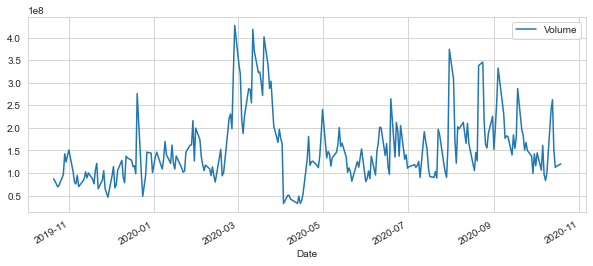

In [7]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] =  AAPL['Adj Close'].rolling(window=ma).mean()

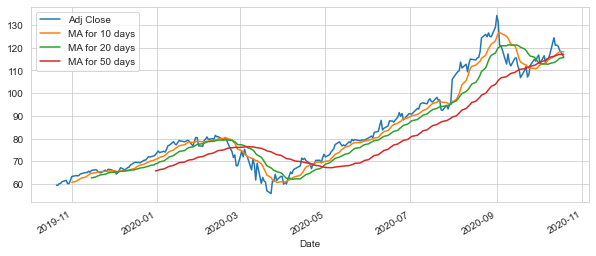

In [9]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

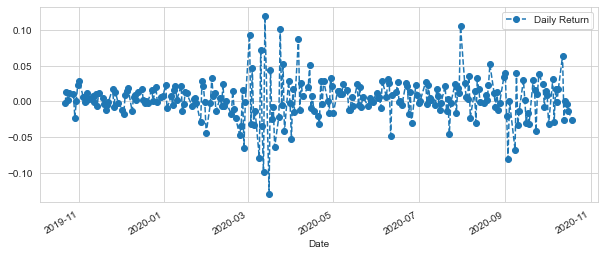

In [10]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

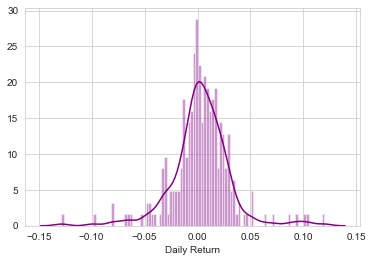

In [11]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

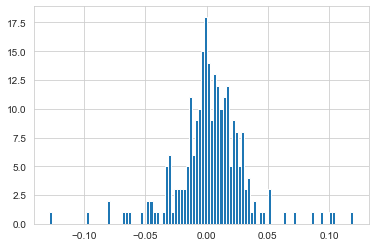

In [12]:
AAPL['Daily Return'].hist(bins=100)

In [13]:
closing_df=data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [14]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2019-10-21,59.536781,1246.150024,136.871765,1785.660034,50.700001
2019-10-22,59.400635,1242.800049,134.834961,1765.729980,51.116001
2019-10-23,60.197727,1259.130005,135.695190,1762.170044,50.936001
2019-10-24,60.296741,1260.989990,138.364792,1780.780029,59.936001
2019-10-25,61.039375,1265.130005,139.145874,1761.329956,65.625999


In [15]:
tech_rets = closing_df.pct_change()

In [16]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2019-10-21,NaN,NaN,NaN,NaN,NaN
2019-10-22,-0.002287,-0.002688,-0.014881,-0.011161,0.008205
2019-10-23,0.013419,0.013140,0.006380,-0.002016,-0.003521
2019-10-24,0.001645,0.001477,0.019674,0.010561,0.176692
2019-10-25,0.012316,0.003283,0.005645,-0.010922,0.094935


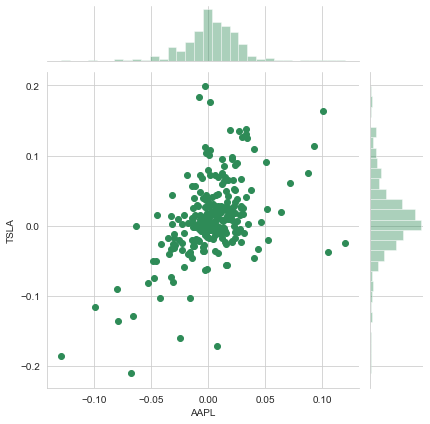

In [17]:
sns.jointplot('AAPL','TSLA',tech_rets,kind='scatter',color='seagreen')

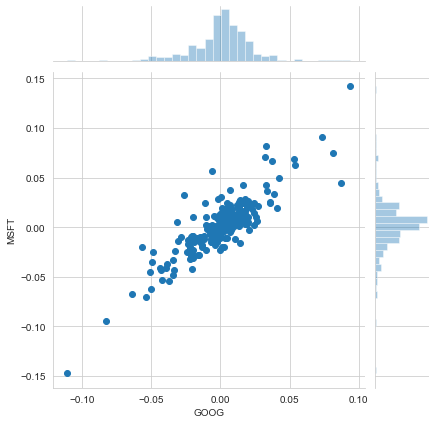

In [18]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

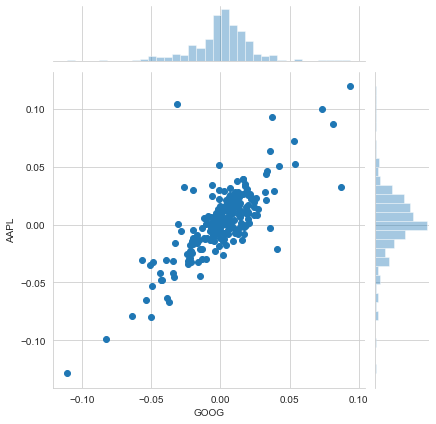

In [19]:
sns.jointplot('GOOG','AAPL',tech_rets,kind='scatter')

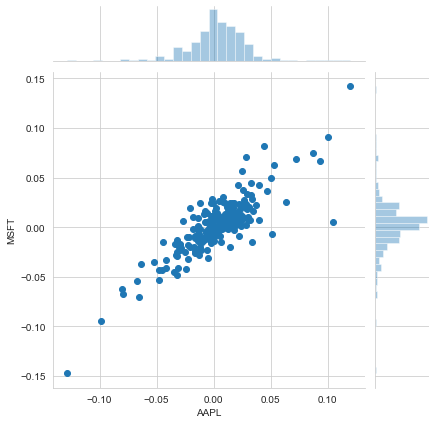

In [20]:
sns.jointplot('AAPL','MSFT',tech_rets,kind='scatter')

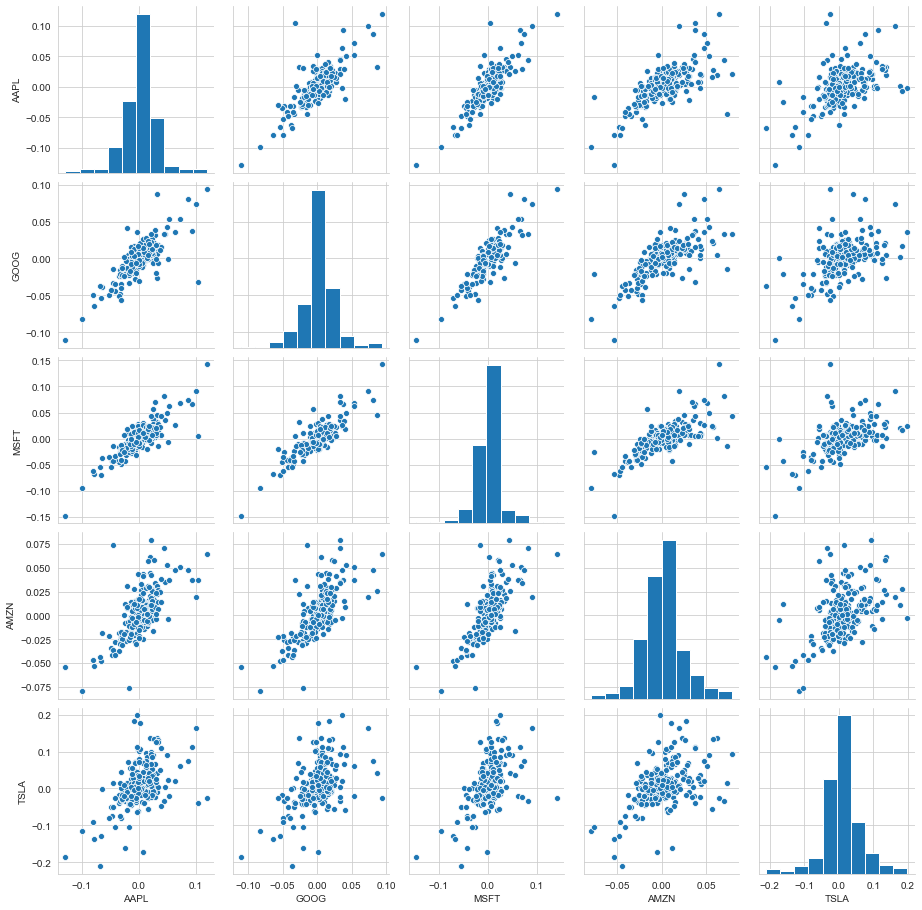

In [21]:
sns.pairplot(tech_rets.dropna())

C:\Users\niini\anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: The following kwargs were not used by contour: 'cmpa'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


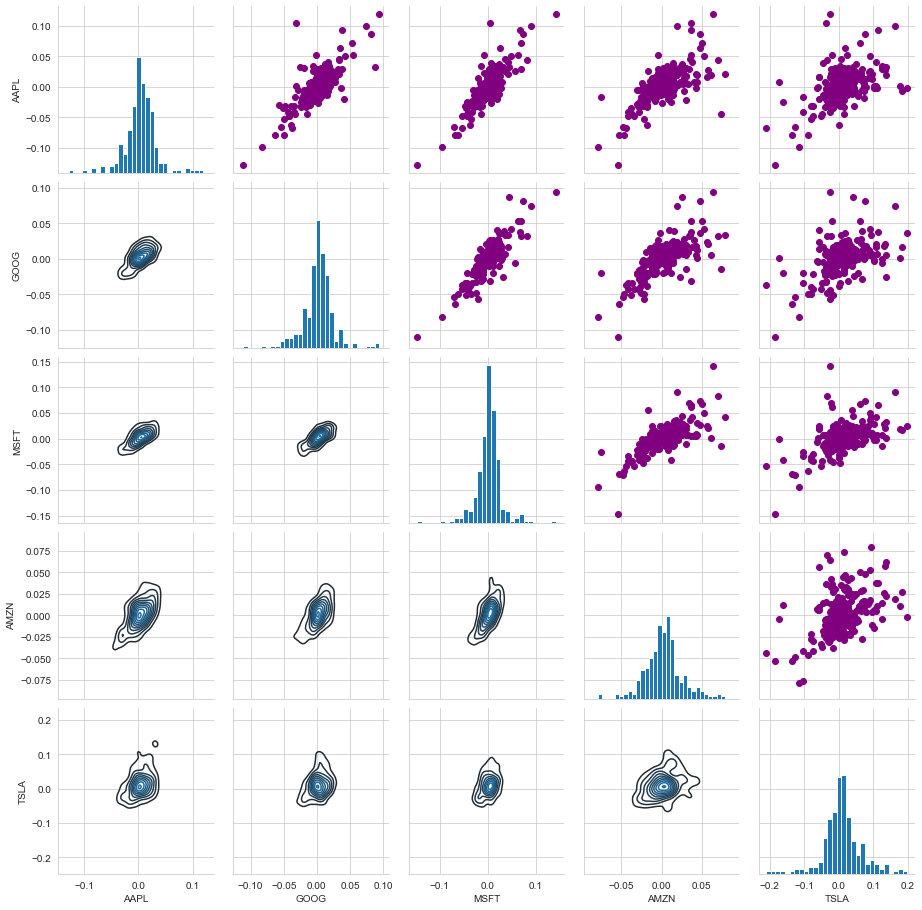

In [22]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmpa='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

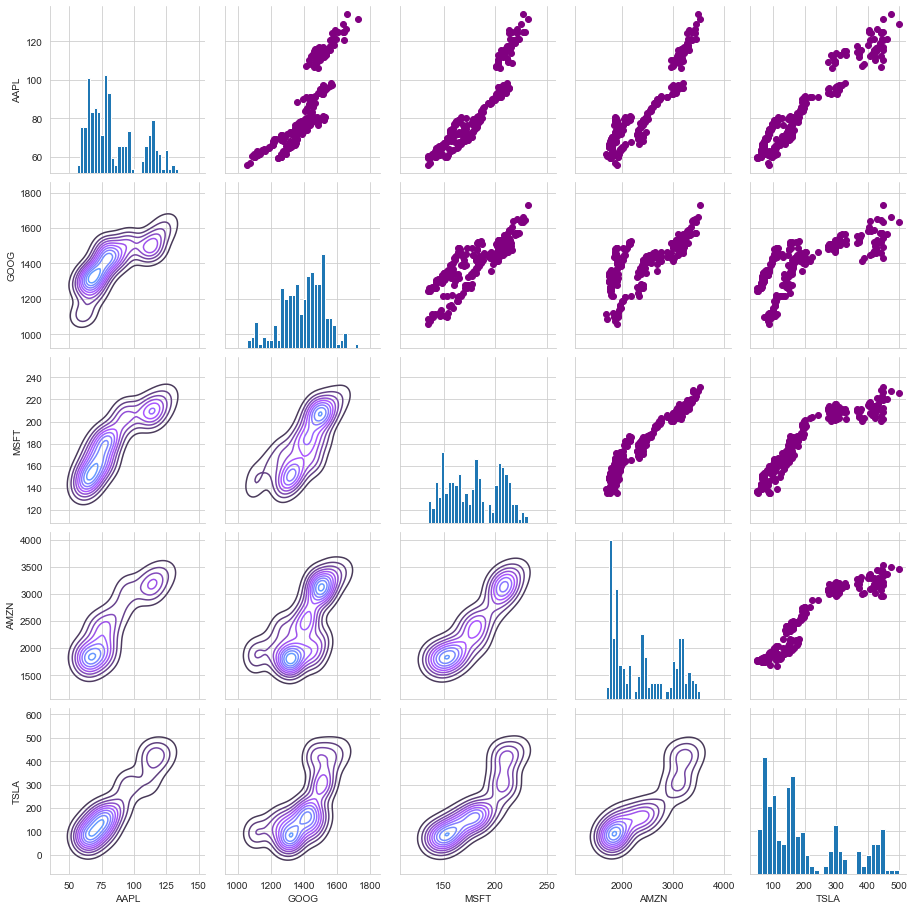

In [23]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

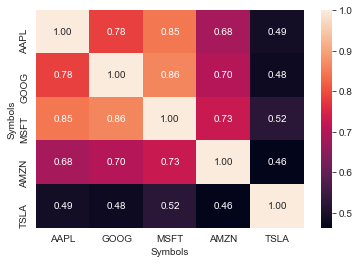

In [24]:
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

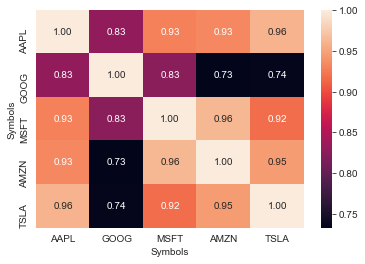

In [25]:
closing_corr= closing_df.dropna().corr()
sns.heatmap(closing_corr, annot=True, fmt='.2f')
plt.show()

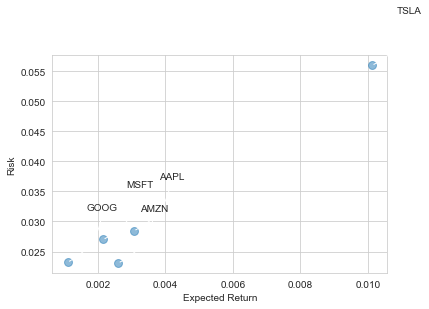

In [28]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50, 50),
    textcoords = 'offset points', ha='right', va='bottom',
    arrowprops= dict(arrowstyle='-', connectionstyle= 'arc3,rad=-0.3'))

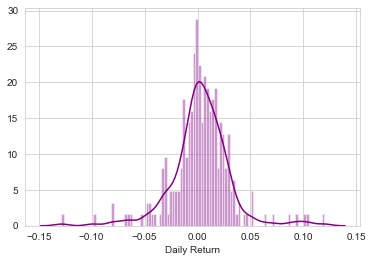

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [30]:
rets['AAPL'].quantile(0.05)

-0.04167423089651573

In [31]:
rets['TSLA'].quantile(0.05)

-0.07419276475630354

In [32]:
rets['GOOG'].quantile(0.05)

-0.03910840559658596

In [33]:
rets['AMZN'].quantile(0.05)

-0.030510126242347446

In [34]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [35]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
        return price

In [36]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-21,1254.629028,1240.599976,1252.260010,1246.150024,1027200,1246.150024
2019-10-22,1250.599976,1241.380005,1247.849976,1242.800049,1023800,1242.800049
2019-10-23,1259.890015,1242.359985,1242.359985,1259.130005,911500,1259.130005
2019-10-24,1264.000000,1253.714966,1260.900024,1260.989990,1028100,1260.989990
2019-10-25,1269.599976,1250.010010,1251.030029,1265.130005,1213100,1265.130005
